In [1]:
import sys
#dlap="/home/mpound/src/pdrtpy"
d="/lupus2/mpound/pdrtpy"
sys.path.insert(0, d)
#sys.path.insert(0,dlap)
from astropy.table import Table
import astropy.units as u
import astropy.constants as constants
#from astropy.nddata import NDData


from measurement import Measurement
from h2excitation import H2Excitation
from plot import H2ExcitationPlot
import math
import matplotlib.pyplot as plt
import numpy as np
import pdrutils as utils

/home/mpound/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:984: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(), op)(other)


In [16]:
fake=False
if fake:
    Measurement.makemeasurement("fakeIntensityH200S0.fits",error="20%",outfile="tests0.fits")
    m0 = Measurement.read("tests0.fits",unit="W m^-2 sr^-1",identifier="H200S0")
    Measurement.makemeasurement("fakeIntensityH200S1.fits",error="20%",outfile="tests1.fits")
    m1 = Measurement.read("tests1.fits",unit="W m^-2  sr^-1",identifier="H200S1")
    Measurement.makemeasurement("fakeIntensityH200S2.fits",error="20%",outfile="tests2.fits")
    m2 = Measurement.read("tests2.fits",unit="W m^-2 sr^-1",identifier="H200S2")
    Measurement.makemeasurement("fakeIntensityH200S3.fits",error="20%",outfile="tests3.fits")
    m3 = Measurement.read("tests3.fits",unit="W m^-2  sr^-1",identifier="H200S3")
    Measurement.makemeasurement("fakeIntensityH200S5.fits",error="20%",outfile="tests5.fits")
    m5 = Measurement.read("tests5.fits",unit="W m^-2 sr^-1",identifier="H200S5")
else:   
    Measurement.makemeasurement("data/h2_test/n2023_LH_SL1_best_H2_S0_I_emgfit_084.MUNGED.fits.new",error="20%",outfile="tests0m.fits")
    m0 = Measurement.read("tests0m.fits",unit="W m^-2 sr^-1",identifier="H200S0")
    #print(m.uncertainty)
    Measurement.makemeasurement("data/h2_test/n2023_SH_SL1_best_H2_S1_I_emgfit_084.fits.new",error="20%",outfile="tests1m.fits")
    m1 = Measurement.read("tests1m.fits",unit="W m^-2 sr^-1",identifier="H200S1")

    Measurement.makemeasurement("data/h2_test/n2023_SH_SL1_best_H2_S2_I_emgfit_084.fits.new",error="20%",outfile="tests2m.fits")
    m2 = Measurement.read("tests2m.fits",unit="W cm^-2  sr^-1",identifier="H200S2")

    Measurement.makemeasurement("data/h2_test/n2023_SL1_LH_best_H2_S3_I_emgfit_084.fits.new",error="20%",outfile="tests3m.fits")
    m3 = Measurement.read("tests3m.fits",unit="W cm^-2  sr^-1",identifier="H200S3")

    Measurement.makemeasurement("data/h2_test/n2023_SL2_LH_best_H2_S5_I_emgfit_084.fits",error="20%",outfile="tests5m.fits")
    m5 = Measurement.read("tests5m.fits",unit="W cm^-2  sr^-1",identifier="H200S5")
    #Measurement.makemeasurement("data/h2_test/n2023_SL2_H2_S7_I_emgfit_084.fits",error="20%",outfile="tests7.fits")
    #m7 = Measurement.read("tests7.fits",unit="erg cm^-2 s^-1 sr^-1",identifier="H200S7")

(14, 15)
INFO: using the unit W m^-2 sr^-1 passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
(14, 15)
INFO: using the unit W m^-2 sr^-1 passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
(14, 15)
INFO: using the unit W cm^-2  sr^-1 passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
(14, 15)
INFO: using the unit W cm^-2  sr^-1 passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
(14, 15)
INFO: using the unit W cm^-2  sr^-1 passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


In [20]:
h = H2Excitation([m0,m2,m1,m3,m5])
h._ac["E_upper/k"]*constants.k_B
#h._compute_column_densities()
#print(h._column_density["H200S1"].unit)
#h._measurements["H200S1"].uncertainty.data
cdnorm = h.column_densities(norm=True)
print(type(cdnorm["H200S1"]))
hplot = H2ExcitationPlot(h)
x = 7
y = 8
xsize=2
ysize=2
#cdwavg = dict()
#cdavg=dict()
#val = 10*u.Unit('cm^-2')
#print(type(val))
#print(type(val*h._measurements["H200S1"].data))
if False:
    for cd in cdnorm:
        weights=cdnorm[cd].uncertainty.array[y:y+ysize,x:x+xsize]
        cdavg[cd] = np.mean(cdnorm[cd].data[y:y+ysize,x:x+xsize])
        cdwavg[cd] = np.average(cdnorm[cd].data[y:y+ysize,x:x+xsize],weights=weights)
        print(cdavg[cd],cdwavg[cd],cdnorm[cd].unit)
    #    print(cd,type(cdavg[cd]),cdavg[cd].unit)#,cdnorm[cd].uncertainty)

    dE = h._ac.loc[m1.id]["dE/k"]*constants.k_B.cgs*h._ac["dE/k"].unit
    A = h._ac.loc[m1.id]["A"]*h._ac["A"].unit
    val = Measurement(4.0*math.pi*u.sr/(A*dE))
    print("value = ",val.data,val.unit," I=",m1.unit)
    n = m1.copy()
    nn = n.multiply(val)
    #print(n.uncertainty)
    print("composed: ",m1.unit*val.unit)
    print(nn.unit)
    utils.check_units(nn.unit,'cm^-2')

<class 'measurement.Measurement'>


In [21]:
#x=50
#y=15
#xsize=10
#ysize=10
cd=h.average_column_density(norm=True,x=x,y=y,xsize=xsize,ysize=ysize,line=False)
e=h.energies(line=False)
#print(type(cd[3]))
#print(type(e[3]))#,type(cd[2]))
#print(list(cd.values())*u.Unit("cm^-2"))
#print(e)
#print(type(e[3]))
#hplot.plot_diagram(x,y,xsize,ysize)

In [24]:
print(h._column_density["H200S1"].unit.to("cm^-2"))

1000.0


dict_values([509.8, 1682.0, 1015.0, 2504.0, 4586.0])
dict_values([7232706110558939.0, 113066440482805.94, 132271164105299.73, 3739429555792.559, 160898735611.3359])


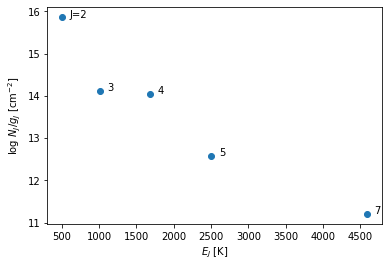

In [22]:
print(np.array(e.values()))
print(cd.values())
ax=plt.subplot(111)
xi=np.array(list(e.values()))#*u.K
yi=np.log10(list(cd.values()))#*u.Unit("cm^-2"))
ax.scatter(xi,yi)
#ax.set_yscale('log')
ax.set_xlabel('$E_J$ [K]')
ax.set_ylabel('log $N_J/g_J$ [cm$^{-2}$]')
first = True
for lab in sorted(cd):
    if first: 
        ss="J="+str(lab)
        first=False
    else: 
        ss=str(lab)
    ax.text(x=e[lab]+100,y=np.log10(cd[lab]),s=ss)

#ax.scatter(np.array(e.values()),np.array(cd.values()))
#sorted(cd).values()

In [ ]:
print(cd)
h.column_densities()

In [ ]:
plt.imshow(m1.data)
plt.colorbar()

In [ ]:
plt.imshow(nn.data)
plt.colorbar()

In [ ]:
import matplotlib.cm as mcm
x=mcm.get_cmap(None)
print(x)

In [ ]:
3*u.Unit("cm^-2").to("1/m2")

In [8]:
h._ac

Line,J_u,dE/k,A,g_u,E_upper/k
,,K,1 / s,,K
str6,int64,float64,float64,float64,float64
H200S0,2,509.8,2.94e-11,5.0,509.8
H200S1,3,844.6,4.76e-10,21.0,1015.0
H200S2,4,1172.0,2.76e-09,9.0,1682.0
H200S3,5,1489.0,9.84e-09,33.0,2504.0
H200S4,6,1792.0,2.64e-08,13.0,3474.0
H200S5,7,2082.5,5.88e-08,45.0,4586.0
H200S6,8,2355.3,1.14e-07,17.0,5829.0
H200S7,9,2610.5,2e-07,57.0,7197.0


In [ ]:
m2.data.shape